<a href="https://colab.research.google.com/github/smruthyunjaya05/MLE/blob/main/regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# Load the 'tips' dataset from seaborn
df = sns.load_dataset('tips')

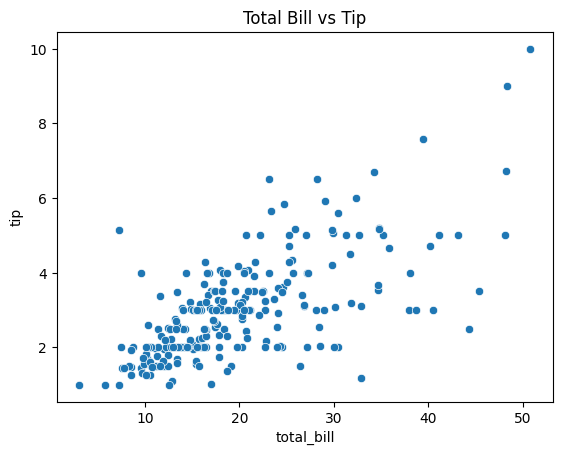

In [3]:
# Visualize the data
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.show()

In [4]:
# Prepare the data for regression
X = df[['total_bill']]  # Feature
y = df['tip']  # Target

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [7]:
# Polynomial Regression (degree 2 for demonstration)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [8]:
# Logistic Regression (Note: Logistic regression is for classification)
# We'll modify the target variable to be binary for demonstration
y_train_binary = (y_train > y_train.median()).astype(int)
y_test_binary = (y_test > y_test.median()).astype(int)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_binary)
y_pred_logistic = logistic_model.predict(X_test)

In [9]:
# Evaluation Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
accuracy_logistic = accuracy_score(y_test_binary, y_pred_logistic)

In [10]:
# Print Accuracy Table
print("Model\t\tMSE\t\tR-squared\tAccuracy")
print("-" * 50)
print(f"Linear\t\t{mse_linear:.4f}\t\t{r2_linear:.4f}\tN/A")
print(f"Polynomial\t{mse_poly:.4f}\t\t{r2_poly:.4f}\tN/A")
print(f"Logistic\tN/A\t\tN/A\t\t{accuracy_logistic:.4f}")

Model		MSE		R-squared	Accuracy
--------------------------------------------------
Linear		0.5688		0.5449	N/A
Polynomial	0.5875		0.5300	N/A
Logistic	N/A		N/A		0.6531


In [11]:
# Visualization
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

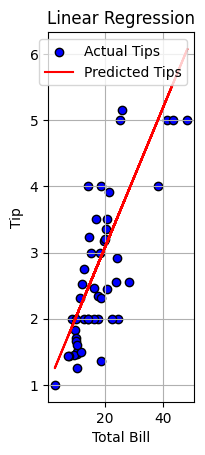

In [14]:
# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, label='Actual Tips', color='blue', edgecolor='k')
plt.plot(X_test, y_pred_linear, color='red', label='Predicted Tips')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


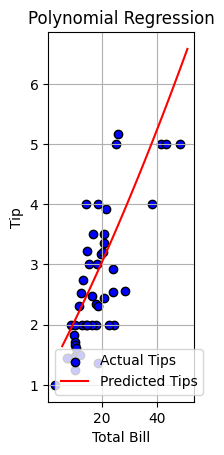

In [15]:
# Polynomial Regression
plt.subplot(1, 3, 2)
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred_range = poly_model.predict(X_range_poly)
plt.scatter(X_test, y_test, label='Actual Tips', color='blue', edgecolor='k')
plt.plot(X_range, y_pred_range, color='red', label='Predicted Tips')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

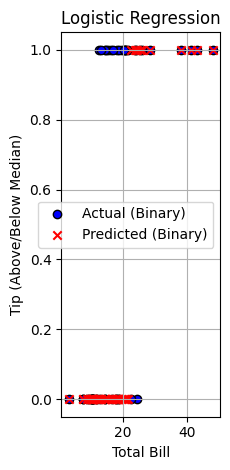

In [16]:
# Logistic Regression (visualization not very meaningful in this case)
plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test_binary, label='Actual (Binary)', color='blue', edgecolor='k')
plt.scatter(X_test, y_pred_logistic, marker='x', color='red', label='Predicted (Binary)')
plt.xlabel('Total Bill')
plt.ylabel('Tip (Above/Below Median)')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()